In [1]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 불러올 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv('../dataset_deeplearning/pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

# 각 속성 정보
# 0 - pregnant: 과거 임신 횟수
# 1 - plasma: 포도당 부하 검사 2시간 후 공복 혈당 농도(mm Hg)
# 2 - pressure: 확장기 혈압(mm Hg)
# 3 - thickness: 삼두근 피부 주름 두께(mm)
# 4 - insulin: 혈청 인슐린(2-hour, mu U/ml)
# 5 - BMI: 체질량 지수(BMI, weight in kg/(height in m)^2)
# 6 - pedigree: 당뇨병 가족력
# 7 - age: 나이
# 8 - class: 당뇨(1), 당뇨아님(0)

In [2]:
# 처음 5줄을 봅니다.
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [3]:
# 데이터의 전반적인 정보를 확인해 봅니다.
print(df.info())

# 결측치가 없고, 데이터타입이 모두 숫자형이라는 사실을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
# 각 정보별 특징을 좀더 자세히 출력합니다.
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [9]:
# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [16]:
df[['pregnant','class']].groupby(['pregnant']).mean()

,class
pregnant,
0,0.342342
1,0.214815
2,0.184466
3,0.360000
4,0.338235
5,0.368421
6,0.320000
7,0.555556
8,0.578947


In [18]:
df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean()

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [21]:
# 임신 횟수와 당뇨병 발병 확률

print(df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))
# pregnant를 기준으로 pregnant, class를 표현
# groupby를 이용하면 자동으로 그룹 라벨이 인덱스가 되는데, 이때 ax_index=False를 통해 인덱스로 사용하지 않을 수 있다.
# sort_values를 통해 정해진 기준에 따라 정렬 가능
# ascending=True : 올림차순

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


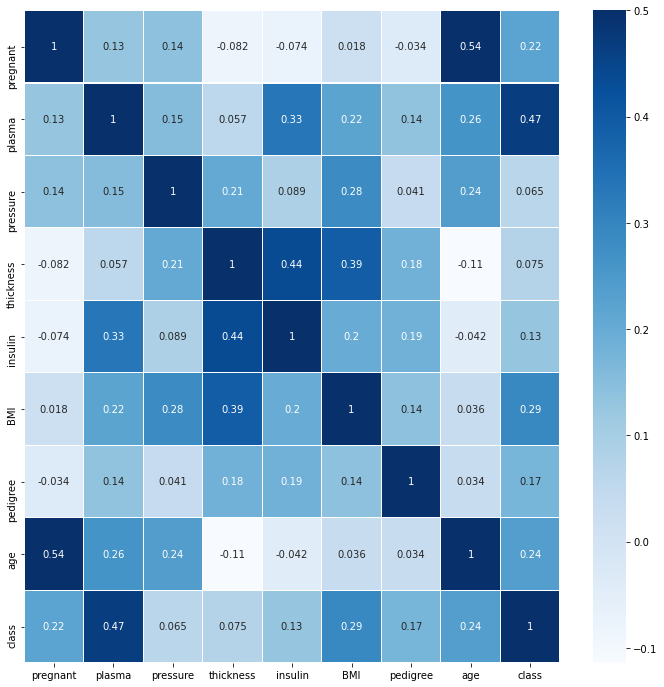

In [31]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.Blues   #그래프의 색상 구성을 정합니다.    # https://codetorial.net/matplotlib/set_colormap.html
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 짙은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()
# 상관관계를 히트맵으로 표현한다.
# 히트맵: 두 항목이 전혀 다른 패턴으로 변화하고 있으면 0, 서로 비슷한 패턴으로 변할수록 1에 가까운 값 출력
# annot=True : 칸마다 상관관계 숫자로 표시

class와 다른 속성과의 상관관계를 살펴보았을 때 plasma가 0.47로 가장 높은 상관관계를 보였다.

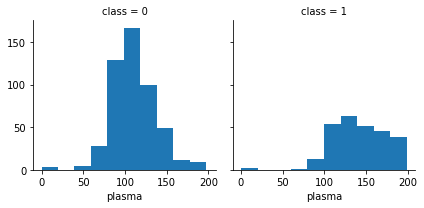

In [7]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

당뇨병환자(1)인 경우 plasma 항목 수치가 150 이상인 경우가 많다.

In [33]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러 옵니다.
dataset = numpy.loadtxt("../dataset_deeplearning/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]    # 속성 정보
Y = dataset[:,8]      # class(당뇨병 발병 여부: 0, 1)

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))    # 입력층: 12개 노드, 입력차원:8차원, 활성화함수: 렐루
model.add(Dense(8, activation='relu'))                  # 은닉층: 8개 노드, 활성화함수: 렐루
model.add(Dense(1, activation='sigmoid'))               # 출력층: 1개 노드, 할성화함수: 시그모이드

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',               # 이진분류 문제이므로 손실함수로 이진교차엔트로피 사용
             optimizer='adam',                          # 최적화 함수: adam
             metrics=['accuracy'])                      # 모델 평가 척도: 정확도(Accuracy)

# 모델을 실행합니다.
model.fit(X, Y, epochs=200, batch_size=10)
# epoch: 학습의 횟수
# batch_size: 모델의 가중치를 한 번 업데이트할 때 사용되는 샘플들의 묶음

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))
# model.evaluate(X, Y)[1]에서 [1]을 쓰는 이유는, loss가 [0]이고 accuracy가 [1]에 자리하기 때문
# [0] loss: 0.4592, [1] accuracy: 0.7721

Epoch 1/200
77/77 [==============================] - 1s 683us/step - loss: 12.0693 - accuracy: 0.6273
Epoch 2/200
77/77 [==============================] - 0s 693us/step - loss: 5.7426 - accuracy: 0.6227
Epoch 3/200
77/77 [==============================] - 0s 636us/step - loss: 3.2875 - accuracy: 0.5365
Epoch 4/200
77/77 [==============================] - 0s 608us/step - loss: 1.6549 - accuracy: 0.5589
Epoch 5/200
77/77 [==============================] - 0s 588us/step - loss: 0.8960 - accuracy: 0.4802
Epoch 6/200
77/77 [==============================] - 0s 630us/step - loss: 0.8696 - accuracy: 0.5314
Epoch 7/200
77/77 [==============================] - 0s 643us/step - loss: 0.7652 - accuracy: 0.6588
Epoch 8/200
77/77 [==============================] - 0s 578us/step - loss: 0.7709 - accuracy: 0.6785
Epoch 9/200
77/77 [==============================] - 0s 577us/step - loss: 0.7154 - accuracy: 0.6615
Epoch 10/200
77/77 [==============================] - 0s 630us/step - loss: 0.6585 - accur

77/77 [==============================] - 0s 592us/step - loss: 0.5166 - accuracy: 0.7316
Epoch 82/200
77/77 [==============================] - 0s 593us/step - loss: 0.5013 - accuracy: 0.7394
Epoch 83/200
77/77 [==============================] - 0s 523us/step - loss: 0.5551 - accuracy: 0.7078
Epoch 84/200
77/77 [==============================] - 0s 512us/step - loss: 0.5110 - accuracy: 0.7106
Epoch 85/200
77/77 [==============================] - 0s 697us/step - loss: 0.4951 - accuracy: 0.7625
Epoch 86/200
77/77 [==============================] - 0s 596us/step - loss: 0.5049 - accuracy: 0.7625
Epoch 87/200
77/77 [==============================] - 0s 565us/step - loss: 0.5153 - accuracy: 0.7317
Epoch 88/200
77/77 [==============================] - 0s 645us/step - loss: 0.4983 - accuracy: 0.7602
Epoch 89/200
77/77 [==============================] - 0s 617us/step - loss: 0.4850 - accuracy: 0.7655
Epoch 90/200
77/77 [==============================] - 0s 593us/step - loss: 0.4929 - accuracy: 

77/77 [==============================] - 0s 544us/step - loss: 0.4813 - accuracy: 0.7676
Epoch 161/200
77/77 [==============================] - 0s 891us/step - loss: 0.4799 - accuracy: 0.7651
Epoch 162/200
77/77 [==============================] - 0s 869us/step - loss: 0.4514 - accuracy: 0.7772
Epoch 163/200
77/77 [==============================] - 0s 708us/step - loss: 0.4969 - accuracy: 0.7515
Epoch 164/200
77/77 [==============================] - 0s 647us/step - loss: 0.4960 - accuracy: 0.7705
Epoch 165/200
77/77 [==============================] - 0s 760us/step - loss: 0.4818 - accuracy: 0.7513
Epoch 166/200
77/77 [==============================] - 0s 591us/step - loss: 0.4581 - accuracy: 0.7711
Epoch 167/200
77/77 [==============================] - 0s 635us/step - loss: 0.4641 - accuracy: 0.7733
Epoch 168/200
77/77 [==============================] - 0s 595us/step - loss: 0.4702 - accuracy: 0.7689
Epoch 169/200
77/77 [==============================] - 0s 575us/step - loss: 0.4654 - a

약 77.21%의 예측 정확도를 보인다.